<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   requestor           100000 non-null  int64 
 1   RequestorSeniority  100000 non-null  object
 2   ITOwner             100000 non-null  int64 
 3   FiledAgainst        100000 non-null  object
 4   TicketType          100000 non-null  object
 5   Severity            100000 non-null  object
 6   Priority            100000 non-null  object
 7   daysOpen            100000 non-null  int64 
 8   Satisfaction        100000 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ticket              100000 non-null  int64 
 1   requestor           100000 non-null  int

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1852061961.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Priority', y='daysOpen', data=df, palette='coolwarm')


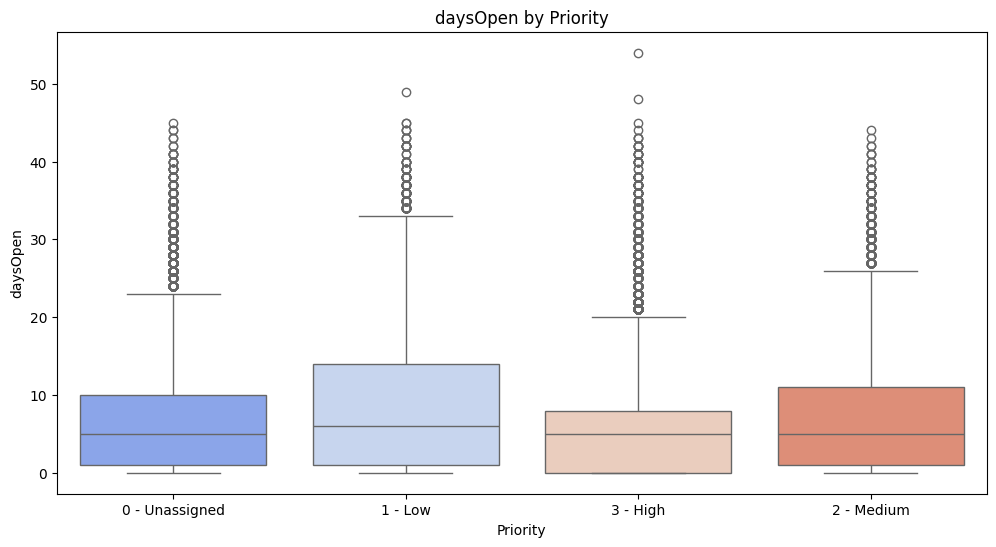

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98084 entries, 0 to 98083
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   requestor           98084 non-null  int64 
 1   RequestorSeniority  98084 non-null  object
 2   ITOwner             98084 non-null  int64 
 3   FiledAgainst        98084 non-null  object
 4   TicketType          98084 non-null  object
 5   Severity            98084 non-null  object
 6   Priority            98084 non-null  object
 7   daysOpen            98084 non-null  int64 
 8   Satisfaction        98084 non-null  object
dtypes: int64(3), object(6)
memory usage: 6.7+ MB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8308\1852061961.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Priority', y='daysOpen', data=df2, palette='coolwarm')


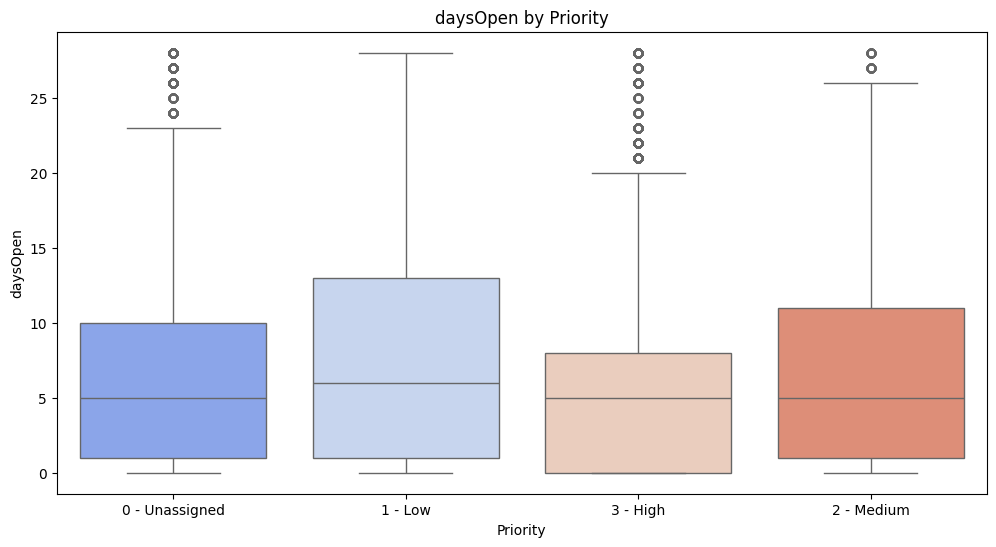

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'D\..\IT-Help-Desk.csv')      # Load .csv format data in pandas
df.head(5)
# Data cleaning
df1 = df.drop(columns='ticket') # dropping ticket column from dataframe and saving into df1
df1.info()
df.info()
#  ✅Missing values removed for data integrity--no null values

# ✅ Outliers detected and dropped using Z-score method-seen

# ✅ Inconsistent entries standardized

# ✅ Categorical features encoded (Label & One-Hot Encoding)

# ✅ Numeric data scaled using StandardScaler
df1.isnull().sum()
# Before outliers removal
# Boxplot grouped by Priority
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='Priority', y='daysOpen', data=df, palette='coolwarm')
plt.title('daysOpen by Priority')
plt.ylabel('daysOpen')
plt.xlabel('Priority')
plt.show()

import numpy as np

cols = df1.columns
all_outliers = []

for col in cols:
    if np.issubdtype(df[col].dtype, np.number):
        mean_val = df1[col].mean()
        sd_val = df1[col].std()
        z_scores = (df1[col] - mean_val) / sd_val
        outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
        all_outliers.extend(outliers)

# Get unique indices of all outliers
all_outliers = np.unique(all_outliers)

# Remove rows with outliers
df2 = df1.drop(index=all_outliers).reset_index(drop=True)

# Display the cleaned DataFrame
df2.info()
# After clearing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Priority', y='daysOpen', data=df2, palette='coolwarm')
plt.title('daysOpen by Priority')
plt.ylabel('daysOpen')
plt.xlabel('Priority')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler

# Separate numeric and non-numeric columns
numeric_columns = df2.select_dtypes(include='number')
non_numeric_columns = df2.select_dtypes(exclude='number')

# Scale numeric columns using StandardScaler from scikit-learn
scaler = StandardScaler()
scaled_numeric_columns = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Combine scaled numeric columns and non-numeric columns
df_s = pd.concat([scaled_numeric_columns, non_numeric_columns], axis=1)

# Display the resulting DataFrame
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,1 - Junior,Systems,Issue,2 - Normal,0 - Unassigned,1 - Unsatisfied
1,1.018578,-0.729287,-0.206609,2 - Regular,Software,Request,1 - Minor,1 - Low,1 - Unsatisfied
2,-0.127648,-0.729287,-0.976033,2 - Regular,Access/Login,Request,2 - Normal,0 - Unassigned,0 - Unknown
3,-1.014156,-0.243552,2.101662,4 - Management,Systems,Request,2 - Normal,0 - Unassigned,0 - Unknown
4,-1.178644,-0.243552,-0.822149,1 - Junior,Access/Login,Request,2 - Normal,1 - Low,1 - Unsatisfied


In [3]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_s['RequestorSeniority']= label_encoder.fit_transform(df_s['RequestorSeniority'])

In [4]:
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2 - Normal,0 - Unassigned,1 - Unsatisfied
1,1.018578,-0.729287,-0.206609,1,Software,Request,1 - Minor,1 - Low,1 - Unsatisfied
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2 - Normal,0 - Unassigned,0 - Unknown
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2 - Normal,0 - Unassigned,0 - Unknown
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2 - Normal,1 - Low,1 - Unsatisfied


In [5]:
df_s['Severity']= label_encoder.fit_transform(df_s['Severity'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0 - Unassigned,1 - Unsatisfied
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1 - Low,1 - Unsatisfied
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0 - Unassigned,0 - Unknown
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0 - Unassigned,0 - Unknown
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1 - Low,1 - Unsatisfied


In [6]:
df_s['Priority']= label_encoder.fit_transform(df_s['Priority'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1 - Unsatisfied
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1 - Unsatisfied
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0 - Unknown
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0 - Unknown
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1 - Unsatisfied


In [7]:
df_s['Satisfaction']= label_encoder.fit_transform(df_s['Satisfaction'])
df_s.head()

,requestor,ITOwner,daysOpen,RequestorSeniority,FiledAgainst,TicketType,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,Systems,Issue,2,0,1
1,1.018578,-0.729287,-0.206609,1,Software,Request,1,1,1
2,-0.127648,-0.729287,-0.976033,1,Access/Login,Request,2,0,0
3,-1.014156,-0.243552,2.101662,3,Systems,Request,2,0,0
4,-1.178644,-0.243552,-0.822149,0,Access/Login,Request,2,1,1


In [8]:
# Identify categorical variables
categorical_vars = df_s.select_dtypes(include='object').columns

# One-hot encode categorical variables using get_dummies
encoded_categorical = pd.get_dummies(df_s[categorical_vars], prefix=categorical_vars, drop_first=True)

# Select numeric variables
numerical_data = df_s.select_dtypes(exclude='object')

# Combine numerical and encoded categorical data
df3 = pd.concat([numerical_data, encoded_categorical], axis=1)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98084 entries, 0 to 98083
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   requestor              98084 non-null  float64
 1   ITOwner                98084 non-null  float64
 2   daysOpen               98084 non-null  float64
 3   RequestorSeniority     98084 non-null  int64  
 4   Severity               98084 non-null  int64  
 5   Priority               98084 non-null  int64  
 6   Satisfaction           98084 non-null  int64  
 7   FiledAgainst_Hardware  98084 non-null  bool   
 8   FiledAgainst_Software  98084 non-null  bool   
 9   FiledAgainst_Systems   98084 non-null  bool   
 10  TicketType_Request     98084 non-null  bool   
dtypes: bool(4), float64(3), int64(4)
memory usage: 5.6 MB


In [10]:
encoded_categorical

,FiledAgainst_Hardware,FiledAgainst_Software,FiledAgainst_Systems,TicketType_Request
0,False,False,True,False
1,False,True,False,True
2,False,False,False,True
3,False,False,True,True
4,False,False,False,True
...,...,...,...,...
98079,False,False,True,False
98080,False,False,False,True
98081,False,False,False,False
98082,False,False,True,True


In [11]:
categorical_vars 

Index(['FiledAgainst', 'TicketType'], dtype='object')

In [12]:
numerical_data

,requestor,ITOwner,daysOpen,RequestorSeniority,Severity,Priority,Satisfaction
0,1.610737,1.699388,-0.514379,0,2,0,1
1,1.018578,-0.729287,-0.206609,1,1,1,1
2,-0.127648,-0.729287,-0.976033,1,2,0,0
3,-1.014156,-0.243552,2.101662,3,2,0,0
4,-1.178644,-0.243552,-0.822149,0,2,1,1
...,...,...,...,...,...,...,...
98079,1.731940,1.699388,-0.360494,1,2,1,1
98080,-0.115528,-1.215022,-0.976033,3,2,2,0
98081,-1.360448,1.491216,-0.976033,0,1,0,1
98082,0.121682,0.450355,1.486123,1,2,0,3


In [13]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
#df4 = df3.iloc[10:98084]

In [16]:
y = df3[['daysOpen']]

In [18]:
x = df3
x.drop(['daysOpen','requestor'], axis=1, inplace=True)

In [19]:
x

,ITOwner,RequestorSeniority,Severity,Priority,Satisfaction,FiledAgainst_Hardware,FiledAgainst_Software,FiledAgainst_Systems,TicketType_Request
0,1.699388,0,2,0,1,False,False,True,False
1,-0.729287,1,1,1,1,False,True,False,True
2,-0.729287,1,2,0,0,False,False,False,True
3,-0.243552,3,2,0,0,False,False,True,True
4,-0.243552,0,2,1,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...
98079,1.699388,1,2,1,1,False,False,True,False
98080,-1.215022,3,2,2,0,False,False,False,True
98081,1.491216,0,1,0,1,False,False,False,False
98082,0.450355,1,2,0,3,False,False,True,True


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [21]:
X_train

,ITOwner,RequestorSeniority,Severity,Priority,Satisfaction,FiledAgainst_Hardware,FiledAgainst_Software,FiledAgainst_Systems,TicketType_Request
79961,1.005481,0,1,1,0,False,False,False,True
76319,-0.937460,1,3,0,2,False,False,False,True
79804,-0.104771,2,2,3,0,False,False,False,True
52602,-0.798678,1,2,0,1,False,True,False,True
79737,-0.035380,3,2,3,1,False,False,True,True
...,...,...,...,...,...,...,...,...,...
21243,-0.104771,3,1,3,1,False,False,False,True
45891,0.519746,3,2,3,1,True,False,False,True
42613,-0.590506,1,2,1,1,False,False,True,True
43567,0.519746,3,2,3,3,False,False,False,True


# Multilinear Regression

In [23]:
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
